## Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
# sys.path.append("..")
import time
print(sys.version)

3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]


Let's import from neural_de the rain removal method

In [2]:
from neural_de.transformations import DeRainEnhancer

We load an example image

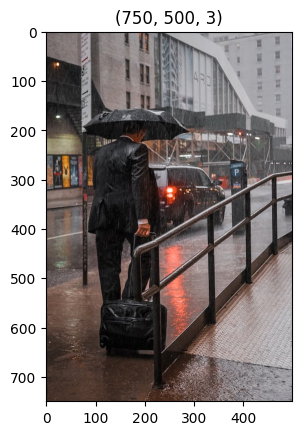

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import os
start=time.time()
input_path = Path('../examples/images/street-rain-men.jpeg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)

## Enhancing an image

We create an instance of ResolutionShift :
- Please note that this method require an access to MinIO in order to retrieve model's weights (at least once, they will then be stored directly on the machine). Once the model is downloaded you can remove or comment the following cell.

In [4]:

shifter = DeRainEnhancer()

[03-07 15:53:03] {C:\ProgramData\miniconda3\envs\env-neural39\lib\site-packages\neural_de\utils\_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-07 15:53:03] {C:\ProgramData\miniconda3\envs\env-neural39\lib\site-packages\neural_de\transformations\_derain_enhancer.py:54} INFO - Checking model availability...
[03-07 15:53:03] {C:\ProgramData\miniconda3\envs\env-neural39\lib\site-packages\neural_de\utils\_model_manager.py:47} INFO - Model derain_checkpoint.pth not found locally or corrupted, downloading it from server
Required pretrain model for  derain  enchancer is not present in local cache, downloading it . . .
[03-07 15:53:07] {C:\ProgramData\miniconda3\envs\env-neural39\lib\site-packages\neural_de\utils\_model_manager.py:70} INFO - Model downloaded and validated
Pretrained model has been downloaded in cache
[03-07 15:53:07] {C:\ProgramData\miniconda3\envs\env-neural39\lib\site-packages\neural_de\transformations\_derain_enhance

We apply the transform method to any number of images. 
- we can have multiple images per call of transform, and call transform multiple time with the same shifter.
- for now, only ratio=2 is available for upsampling, as the underlaying transformer was trained for a 2x resolution.

In [5]:
derained_images = shifter.transform([image])


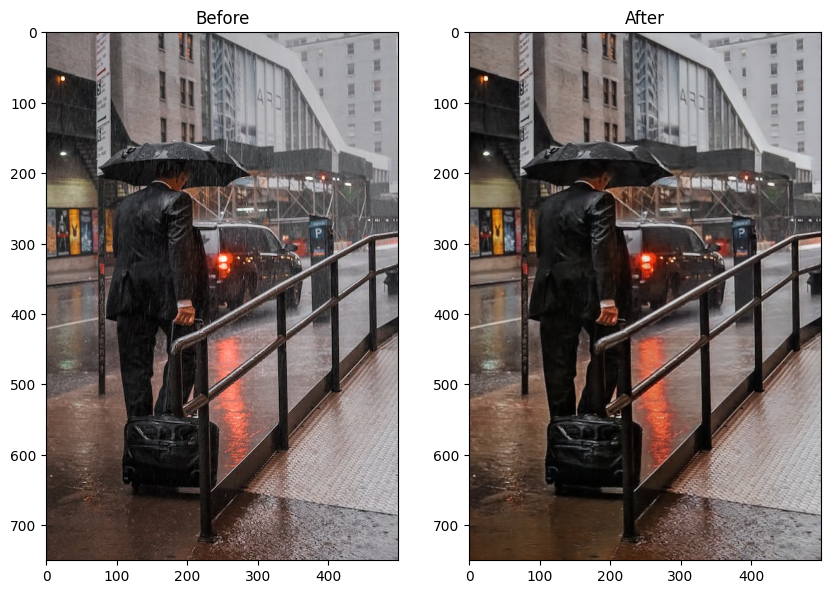

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("After")
plt.imshow(derained_images[0])
plt.show()

In [7]:
end=time.time()
print("temps final : ",end-start)

temps final :  23.97971224784851
